# Quantum Dial


In [1]:
N = 7

In [2]:
import matplotlib.pyplot as plt
from scipy.linalg import expm
import numpy as np

def create_momentum_operator_dft(n_states=4):
    """
    Creates a momentum operator using the discrete Fourier transform basis.
    
    Args:
        n_states (int): Number of discrete states in the system
        
    Returns:
        P (ndarray): Momentum operator in position basis
    """
    # Create DFT matrix
    F = np.zeros((n_states, n_states), dtype=complex)
    for x in range(n_states):
        for k in range(n_states):
            F[k,x] = np.exp(-2j * np.pi * k * x / n_states) / np.sqrt(n_states)
    
    # Create diagonal momentum operator in k-space
    P_k = np.zeros((n_states, n_states), dtype=complex)
    for k in range(n_states):
        # Shift k values to be symmetric around 0
        if k <= n_states//2:
            k_val = k
        else:
            k_val = k - n_states
        P_k[k,k] = 2 * np.pi * k_val / n_states
    
    # Transform back to position space
    P = F.conj().T @ P_k @ F
    
    return P, F, P_k

# Create the momentum operator
P, F, P_k = create_momentum_operator_dft(N)


$$
\psi(t) = \exp(-i t \hat{p})\psi(0)
$$

In [3]:
psi_0 = np.zeros(N)
psi_0[0] = 1
psi = []
for t in np.linspace(0,8,101):
    psi.append( expm(-1j*t* P) @ psi_0 )
psi = np.array(psi)

### Wave function probability

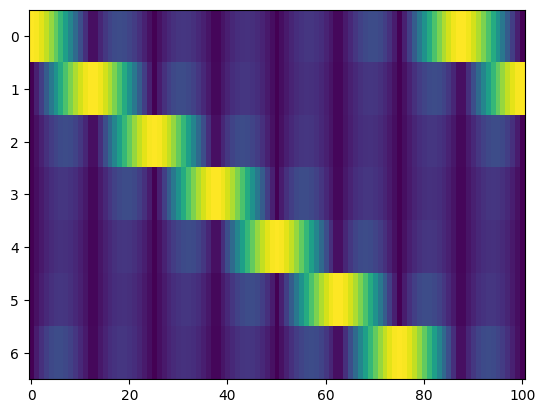

In [5]:
plt.imshow(np.abs(psi).T, aspect='auto')

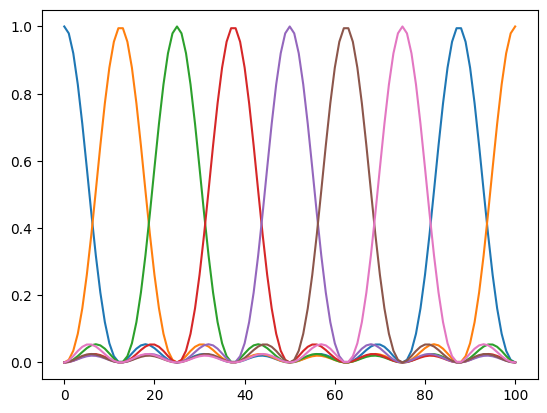

In [6]:
plt.plot(np.abs(psi)**2);

### Wave function amplitude

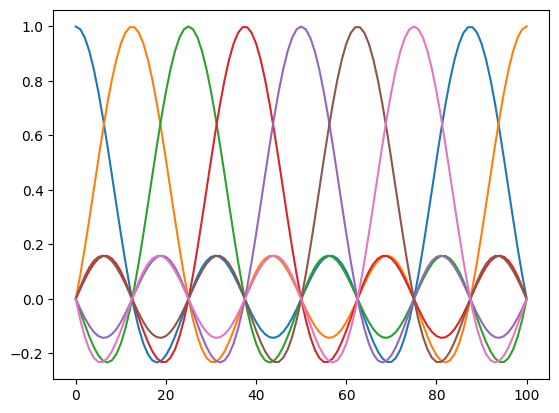

In [7]:
plt.plot(psi.real);